In [2]:
import sys
from collections import Counter
from pathlib import Path

import PIL
import torch
import torchvision
import ultralytics
from IPython.display import Video
from PIL import Image
from torchvision import transforms
from torchvision.io import read_image
from torchvision.utils import make_grid
from ultralytics import YOLO

In [3]:
yolo = YOLO(task="detect", model="yolov8s.pt")

In [4]:
yolo.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [5]:
yolo.names[5]

'bus'

In [6]:
class_assigned_to_23 = ...
print(f"{class_assigned_to_23} corresponds to 23")

Ellipsis corresponds to 23


In [7]:
class_assigned_to_23 = yolo.names[23]
print(f"{class_assigned_to_23} corresponds to 23")

giraffe corresponds to 23


In [8]:
classes_not_in_yolo = [
    "ambulance",
    "army vehicle",
    "auto rickshaw",
    "garbagevan",
    "human hauler",
    "minibus",
    "minivan",
    "pickup",
    "policecar",
    "rickshaw",
    "scooter",
    "suv",
    "taxi",
    "three wheelers (CNG)",
    "van",
    "wheelbarrow",
]

In [9]:
"ambulance" not in yolo.names.values()

True

In [10]:
is_army_vehicle_inlcuded = "army vechile" not in yolo.names.values()
print(is_army_vehicle_inlcuded)

True


In [11]:
data_dir = Path("data_video", "extracted_frames")
image_path = data_dir / "frame_1050.jpg"

result = yolo(image_path)


image 1/1 d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\extracted_frames\frame_1050.jpg: 384x640 2 persons, 1 bicycle, 8 cars, 2 buss, 311.7ms
Speed: 6.0ms preprocess, 311.7ms inference, 21.9ms postprocess per image at shape (1, 3, 384, 640)


In [12]:
print(f"Type of result: {type(result)}")
print(f"Length of result: {len(result)}")

Type of result: <class 'list'>
Length of result: 1


In [13]:
image_path_task = data_dir / "frame_2575.jpg"
result_task = yolo(image_path_task)

print(type(result_task))



image 1/1 d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\extracted_frames\frame_2575.jpg: 384x640 13 persons, 11 cars, 1 motorcycle, 1 truck, 1 backpack, 207.1ms
Speed: 2.0ms preprocess, 207.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)
<class 'list'>


In [14]:
result = yolo.predict(image_path, conf=0.5, save=True, save_txt=True)


image 1/1 d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\extracted_frames\frame_1050.jpg: 384x640 1 person, 1 bicycle, 3 cars, 2 buss, 220.1ms
Speed: 2.5ms preprocess, 220.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\hp\runs\detect\predict3
1 label saved to C:\Users\hp\runs\detect\predict3\labels


In [15]:
result_task = yolo.predict(image_path_task, conf=0.5, save=True, save_txt=True)


image 1/1 d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\extracted_frames\frame_2575.jpg: 384x640 2 persons, 6 cars, 1 motorcycle, 199.0ms
Speed: 1.7ms preprocess, 199.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\hp\runs\detect\predict3
2 labels saved to C:\Users\hp\runs\detect\predict3\labels


In [16]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [17]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 1., 5., 5., 0.])
conf: tensor([0.9039, 0.8548, 0.8375, 0.8323, 0.8061, 0.6084, 0.5534])
data: tensor([[4.3695e+02, 1.6984e+02, 5.4202e+02, 2.3865e+02, 9.0395e-01, 2.0000e+00],
        [1.5662e+02, 1.5208e+02, 3.2427e+02, 2.5230e+02, 8.5477e-01, 2.0000e+00],
        [5.3971e+02, 1.8355e+02, 6.1373e+02, 2.3000e+02, 8.3751e-01, 2.0000e+00],
        [2.7851e+02, 1.7785e+02, 4.4652e+02, 2.9214e+02, 8.3232e-01, 1.0000e+00],
        [4.6189e-01, 1.0103e+01, 7.6920e+01, 2.1562e+02, 8.0605e-01, 5.0000e+00],
        [5.4849e+02, 1.3676e+02, 6.1407e+02, 1.8558e+02, 6.0838e-01, 5.0000e+00],
        [3.1102e+02, 1.0355e+02, 3.7114e+02, 2.5445e+02, 5.5339e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (360, 640)
shape: torch.Size([7, 6])
xywh: tensor([[489.4863, 204.2482, 105.0627,  68.8101],
        [240.4418, 202.1921, 167.6510, 100.2223],
        [576.7197, 206.7732,  74.0134,  46.4463],
        [362.5140,

In [18]:
print(result[0].boxes.cls)
print(f"Number of objects detected: {len(result[0].boxes.cls)}")

tensor([2., 2., 2., 1., 5., 5., 0.])
Number of objects detected: 7


In [19]:
number_of_detected_objs = len(result_task[0].boxes.cls)
print(f"Number of objects detected in frame_2575.jpg: {number_of_detected_objs}")

Number of objects detected in frame_2575.jpg: 9


In [20]:
object_counts = Counter([yolo.names[int(cls)] for cls in result[0].boxes.cls])
object_counts

Counter({'car': 3, 'bus': 2, 'bicycle': 1, 'person': 1})

In [21]:
object_counts_task = Counter(
    [yolo.names[int(cls)] for cls in result_task[0].boxes.cls]
)

most_common_class, count_of_class = object_counts_task.most_common(n=1)[0]
print(f"Most common class: {most_common_class}")
print(f"Number of detected {most_common_class}: {count_of_class}")

Most common class: car
Number of detected car: 6


In [22]:
print(result[0].boxes.conf)
print(f"Number of objects detected: {len(result[0].boxes.conf)}")

tensor([0.9039, 0.8548, 0.8375, 0.8323, 0.8061, 0.6084, 0.5534])
Number of objects detected: 7


In [23]:
length_of_confidence_tensor = len(result_task[0].boxes.conf)
print(f"Number of objects detected: {length_of_confidence_tensor}")

Number of objects detected: 9


In [24]:
number_of_confident_objects = (result[0].boxes.conf > 0.75).sum().item()
print(f"Number of objects detected with 50% confidence: {number_of_confident_objects}")

Number of objects detected with 50% confidence: 5


In [25]:
number_of_confident_objects_task = (result_task[0].boxes.conf > 0.75).sum().item()

print(
    f"Number of objects detected in frame_2575.jpg with 50% confidence: {number_of_confident_objects_task}"
)

Number of objects detected in frame_2575.jpg with 50% confidence: 5


In [26]:
result[0].boxes.xywh

tensor([[489.4863, 204.2482, 105.0627,  68.8101],
        [240.4418, 202.1921, 167.6510, 100.2223],
        [576.7197, 206.7732,  74.0134,  46.4463],
        [362.5140, 234.9969, 168.0120, 114.2923],
        [ 38.6910, 112.8627,  76.4582, 205.5199],
        [581.2806, 161.1671,  65.5864,  48.8183],
        [341.0811, 179.0009,  60.1201, 150.9053]])

In [27]:
result[0].orig_shape

(360, 640)

In [28]:
result[0].boxes.xywhn[0]

tensor([0.7648, 0.5674, 0.1642, 0.1911])

In [29]:
result[0].boxes.xywh[0] / torch.Tensor([640, 360, 640, 360]).to("cpu")

tensor([0.7648, 0.5674, 0.1642, 0.1911])

In [30]:
original_shape_task = result_task[0].orig_shape
print(f"Original shape of frame_2574.jpg: {original_shape_task}")

Original shape of frame_2574.jpg: (360, 640)


In [31]:
normalized_xywh = result_task[0].boxes.xywhn
print(f"Normalized xywh bounding box for frame_2575.jpg: {normalized_xywh[0]}")

Normalized xywh bounding box for frame_2575.jpg: tensor([0.4132, 0.6954, 0.4033, 0.5825])


In [32]:
normalized_xywh_task = (
    result_task[0].boxes.xywh[0] / torch.Tensor([640, 360, 640, 360]).to("cpu")
)
print(f"Normalized xywh bounding box for frame_2575.jpg: {normalized_xywh[0]}")

Normalized xywh bounding box for frame_2575.jpg: tensor([0.4132, 0.6954, 0.4033, 0.5825])


In [33]:
result[0].boxes.xyxy

tensor([[4.3695e+02, 1.6984e+02, 5.4202e+02, 2.3865e+02],
        [1.5662e+02, 1.5208e+02, 3.2427e+02, 2.5230e+02],
        [5.3971e+02, 1.8355e+02, 6.1373e+02, 2.3000e+02],
        [2.7851e+02, 1.7785e+02, 4.4652e+02, 2.9214e+02],
        [4.6189e-01, 1.0103e+01, 7.6920e+01, 2.1562e+02],
        [5.4849e+02, 1.3676e+02, 6.1407e+02, 1.8558e+02],
        [3.1102e+02, 1.0355e+02, 3.7114e+02, 2.5445e+02]])

In [34]:
result[0].boxes.xyxyn

tensor([[6.8274e-01, 4.7179e-01, 8.4690e-01, 6.6293e-01],
        [2.4471e-01, 4.2245e-01, 5.0667e-01, 7.0084e-01],
        [8.4330e-01, 5.0986e-01, 9.5895e-01, 6.3888e-01],
        [4.3517e-01, 4.9403e-01, 6.9769e-01, 8.1151e-01],
        [7.2170e-04, 2.8063e-02, 1.2019e-01, 5.9895e-01],
        [8.5701e-01, 3.7988e-01, 9.5949e-01, 5.1549e-01],
        [4.8597e-01, 2.8763e-01, 5.7991e-01, 7.0682e-01]])

In [35]:
location_of_results = Path(result[0].save_dir)

print(f"Results saved to {location_of_results}")
location_of_results.exists()

Results saved to C:\Users\hp\runs\detect\predict3


True

In [36]:
location_of_results_task = result_task[0].save_dir
print(f"Results for frame_2575.jpg saved to {location_of_results_task}")

Results for frame_2575.jpg saved to C:\Users\hp\runs\detect\predict3


In [37]:
result[0].speed

{'preprocess': 2.5129000000561064,
 'inference': 220.06199999987075,
 'postprocess': 1.5546000004178495}

In [38]:
print(f"Total time in milliseconds: {sum(result[0].speed.values())}")

Total time in milliseconds: 224.1295000003447


In [39]:
total_time = result_task[0].speed.values()
print(f"Total time in milliseconds: {total_time}")

Total time in milliseconds: dict_values([1.7309999998360581, 199.00559999996403, 1.9162999997206498])


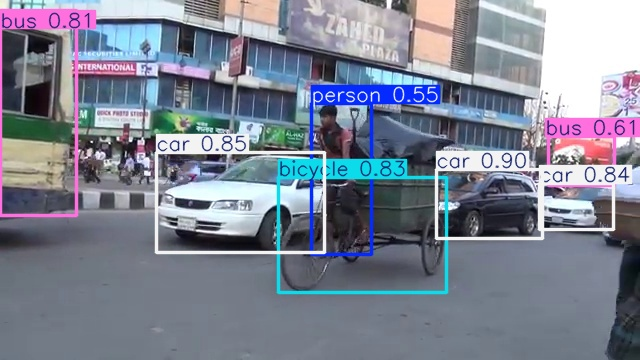

In [40]:
Image.open(location_of_results / "frame_1050.jpg")

In [41]:
location_of_results_task

'C:\\Users\\hp\\runs\\detect\\predict3'

In [42]:
data_dir

WindowsPath('data_video/extracted_frames')

In [43]:
Path(location_of_results_task)

WindowsPath('C:/Users/hp/runs/detect/predict3')

In [44]:
location_of_results_task = Path(location_of_results_task)

In [45]:
location_of_results_task

WindowsPath('C:/Users/hp/runs/detect/predict3')

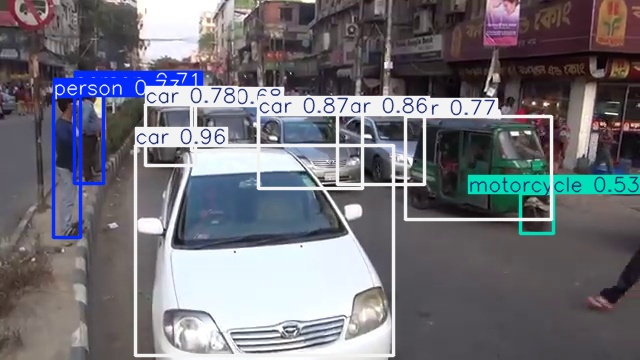

In [46]:
# Display image frame_2575.jpg with the bounding boxes
Image.open(location_of_results_task / "frame_2575.jpg")

In [47]:
with (location_of_results / "labels" / "frame_1050.txt").open("r") as f:
    print(f.read())

2 0.764822 0.567356 0.16416 0.191139
2 0.37569 0.561645 0.261955 0.278395
2 0.901125 0.57437 0.115646 0.129017
1 0.566428 0.652769 0.262519 0.317479
5 0.0604546 0.313508 0.119466 0.570889
5 0.908251 0.447686 0.102479 0.135606
0 0.532939 0.497225 0.0939376 0.419181



In [48]:
with (location_of_results_task / "labels" / "frame_2575.txt").open("r") as f:
    print(f.read())

2 0.413234 0.695446 0.403302 0.58246
2 0.484847 0.421423 0.163283 0.204253
2 0.595295 0.414594 0.135674 0.193444
2 0.266838 0.373886 0.0775616 0.169089
2 0.74819 0.466358 0.227984 0.285972
0 0.104577 0.463135 0.0432231 0.39213
0 0.139043 0.379178 0.0446077 0.262667
2 0.351648 0.354532 0.105288 0.124523
3 0.838957 0.592829 0.0514652 0.112449



In [49]:
def display_sample_images(dir_path, sample=5):
    dir_path = Path(dir_path) if isinstance(dir_path, str) else dir_path

    image_list = []
    # Sort the images to ensure they are processed in order
    images = sorted(dir_path.glob("*.jpg"))
    if not images:
        return None

    # Iterate over the first 'sample' images
    for img_path in images[:sample]:
        img = read_image(str(img_path))
        resize_transform = transforms.Resize((240, 240))
        img = resize_transform(img)
        image_list.append(img)

    # Organize the grid to have 'sample' images per row
    Grid = make_grid(image_list, nrow=5)
    # Convert the tensor grid to a PIL Image for display
    img = torchvision.transforms.ToPILImage()(Grid)
    return img

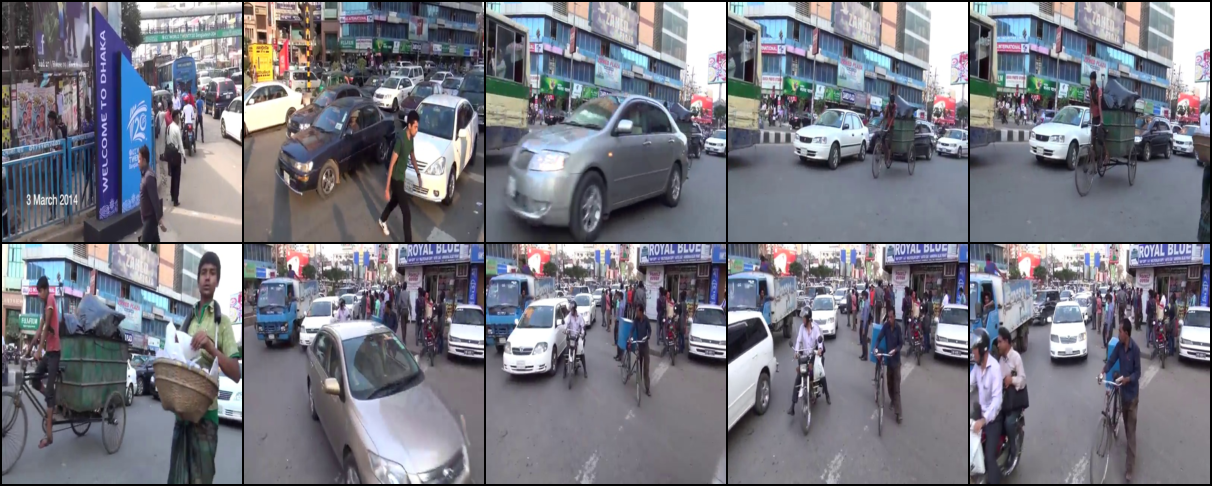

In [50]:
display_sample_images(data_dir, sample=10)

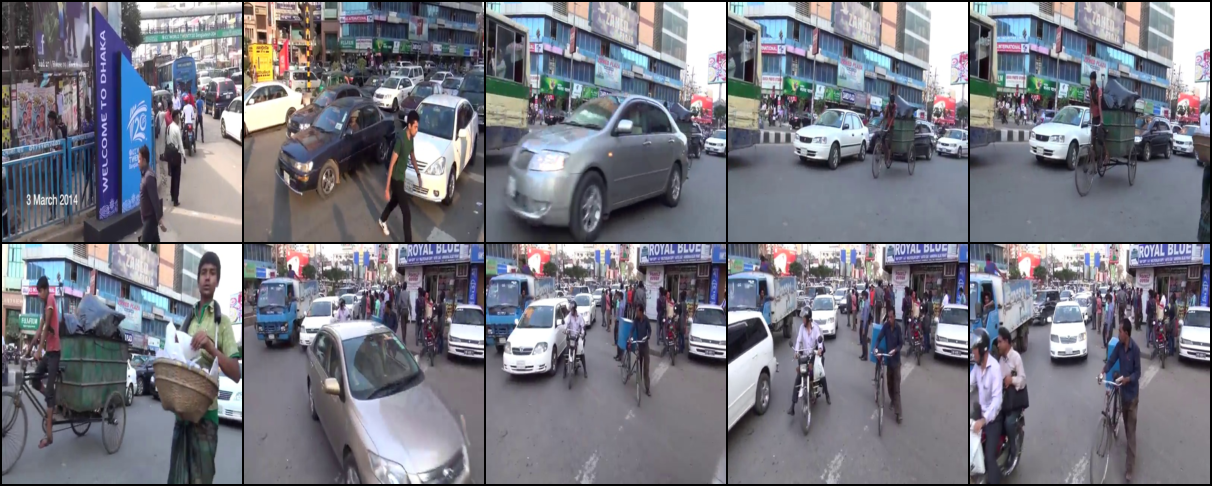

In [51]:
# Display the first ten images
display_sample_images(data_dir, sample = 10)

In [52]:
images_path = list(data_dir.iterdir())[:25]
images_path

[WindowsPath('data_video/extracted_frames/frame_0.jpg'),
 WindowsPath('data_video/extracted_frames/frame_100.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1000.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1025.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1050.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1075.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1100.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1125.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1150.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1175.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1200.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1225.jpg'),
 WindowsPath('data_video/extracted_frames/frame_125.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1250.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1275.jpg'),
 WindowsPath('data_video/extracted_frames/frame_1300.jpg'),
 WindowsPath('data_video/extracted_frames/fra

In [53]:
images_path_task = list(data_dir.iterdir())[-10:]

print(f"Number of frames in list: {len(images_path_task)}")
images_path_task

Number of frames in list: 10


[WindowsPath('data_video/extracted_frames/frame_9075.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9100.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9125.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9150.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9175.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9200.jpg'),
 WindowsPath('data_video/extracted_frames/frame_9225.jpg'),
 WindowsPath('data_video/extracted_frames/frame_925.jpg'),
 WindowsPath('data_video/extracted_frames/frame_950.jpg'),
 WindowsPath('data_video/extracted_frames/frame_975.jpg')]

In [54]:
results = yolo.predict(
    images_path,
    conf=0.5,
    save=True,
    save_txt=True,
    project=Path("runs", "detect"),
    name="multiple_frames",
)


0: 384x640 6 persons, 5 cars, 1 motorcycle, 1 bus, 287.8ms
1: 384x640 2 persons, 13 cars, 287.8ms
2: 384x640 3 cars, 1 bus, 287.8ms
3: 384x640 2 persons, 5 cars, 1 bus, 287.8ms
4: 384x640 1 person, 1 bicycle, 3 cars, 2 buss, 287.8ms
5: 384x640 2 persons, 1 bicycle, 2 cars, 287.8ms
6: 384x640 5 persons, 4 cars, 1 motorcycle, 1 truck, 287.8ms
7: 384x640 7 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck, 287.8ms
8: 384x640 6 persons, 1 bicycle, 4 cars, 2 motorcycles, 1 truck, 287.8ms
9: 384x640 7 persons, 1 bicycle, 6 cars, 1 truck, 287.8ms
10: 384x640 5 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck, 287.8ms
11: 384x640 8 persons, 5 cars, 1 truck, 287.8ms
12: 384x640 1 person, 12 cars, 287.8ms
13: 384x640 4 persons, 4 cars, 1 motorcycle, 287.8ms
14: 384x640 4 persons, 6 cars, 287.8ms
15: 384x640 4 persons, 8 cars, 1 motorcycle, 1 bus, 1 truck, 287.8ms
16: 384x640 3 persons, 5 cars, 1 bus, 287.8ms
17: 384x640 4 persons, 7 cars, 1 bus, 287.8ms
18: 384x640 3 persons, 4 cars, 1 motorcy

In [55]:
print(results[0].save_dir)

D:\Projects\Traffic Monitoring in Dhaka using Deep learning\runs\detect\multiple_frames3


In [56]:
results_task = yolo.predict(
images_path_task,
conf=0.5,
save=True,
save_txt=True,
project=Path("runs", "detect"),
name="multiple_frames_task",
)

print(f"\nResults from task saved to: {results_task[0].save_dir}")



0: 384x640 8 persons, 2 bicycles, 3 cars, 173.6ms
1: 384x640 8 persons, 4 bicycles, 6 cars, 1 motorcycle, 173.6ms
2: 384x640 9 persons, 3 bicycles, 3 cars, 1 truck, 173.6ms
3: 384x640 7 persons, 6 bicycles, 7 cars, 1 motorcycle, 173.6ms
4: 384x640 8 persons, 3 bicycles, 8 cars, 1 motorcycle, 173.6ms
5: 384x640 7 persons, 3 bicycles, 6 cars, 1 motorcycle, 173.6ms
6: 384x640 5 persons, 6 cars, 173.6ms
7: 384x640 4 persons, 3 cars, 1 bus, 173.6ms
8: 384x640 3 persons, 3 cars, 1 bus, 1 handbag, 173.6ms
9: 384x640 3 persons, 3 cars, 1 bus, 173.6ms
Speed: 3.4ms preprocess, 173.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to D:\Projects\Traffic Monitoring in Dhaka using Deep learning\runs\detect\multiple_frames_task3
10 labels saved to D:\Projects\Traffic Monitoring in Dhaka using Deep learning\runs\detect\multiple_frames_task3\labels

Results from task saved to: D:\Projects\Traffic Monitoring in Dhaka using Deep learning\runs\detect\multiple_frames_task

In [ ]:
image = display_sample_images(results[0].save_dir, sample=10)
image

In [ ]:
image_task = display_sample_images(results_task[0].save_dir, sample=10)

In [ ]:
image_task

In [ ]:
video_path = Path("data_video", "dhaka_traffic.mp4")
Video(video_path)

In [60]:
!ffmpeg -ss 00:00:00 -to 00:00:30 -y -i $video_path -c copy data_video/dhaka_traffic_truncated.mp4

ffmpeg version 8.0-essentials_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 15.2.0 (Rev8, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-dxva2 --enable-d3d11va --enable-d3d12va --enable-ffnvcodec --enable-libvpl --enable-nvdec --enable-nvenc --enable-vaapi --enable-openal --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enabl

In [ ]:
video_truncated_path = Path("data_video", "dhaka_traffic_truncated.mp4")
Video(video_truncated_path, embed=True)

In [62]:
results_video = yolo.predict(
    video_truncated_path,
    conf=0.5,
    save=True,
    stream=True,
    project=Path("runs", "detect"),
    name="video_source",
)

In [63]:
for result in results_video:
    continue


video 1/1 (frame 1/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 (no detections), 266.2ms
video 1/1 (frame 2/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 (no detections), 191.5ms
video 1/1 (frame 3/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 (no detections), 185.7ms
video 1/1 (frame 4/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 2 persons, 203.2ms
video 1/1 (frame 5/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 5 persons, 1 car, 1 bus, 193.9ms
video 1/1 (frame 6/750) d:\Projects\Traffic Monitoring in Dhaka using Deep learning\data_video\dhaka_traffic_truncated.mp4: 384x640 5 persons, 1 car, 1 bus, 193.9ms
video 1/1 (frame 7/750) d:\Projects\Traffic Mon

In [65]:
import os
print(video_truncated_path, os.path.exists(video_truncated_path))


data_video\dhaka_traffic_truncated.mp4 True


In [ ]:
!yolo task=detect mode=predict conf=0.5 model=yolov8s.pt source="data_video/dhaka_traffic_truncated.mp4" project="runs/detect" name="command_line"



In [ ]:
!ffmpeg -y -i runs/detect/command_line/dhaka_traffic_truncated.avi output.mp4

In [ ]:
Video("output.mp4")

In [ ]:
# Run YOLO
!yolo task=detect mode=predict conf=0.5 model=yolov8s.pt source="data_video/dhaka_traffic_truncated.mp4" project="runs/detect" name="command_line_task"

# Check output files
import os
print(os.listdir("runs/detect/command_line_task"))



